# Topics

## 1. Dictionaries
## 2. Class


In [5]:
temps_lst = [45., 50., 54., 60.]                   #  list
temps_dict = {0:45., 1:50., 2:54., 3:60.}          #  dictionary: key-value pairs; 
## Notice the usage of curly brackets:  {}

In [6]:
print type(temps_lst), type(temps_dict)
print temps_lst[0], temps_dict[0]   # a key acts as an index

<type 'list'> <type 'dict'>
45.0 45.0


## So, in a sense, a list is a dictionary with implied keys being 0-indexed integers.

Dictionaries are much, much more flexible:

One can use any kind of number or text as the keys.

In [12]:
temps_dict = {'Seattle':45., 'Portland':50., 'San Francisco':54., 'Los Angeles':60.}

In [3]:
print temps_dict['Portland']

50.0


In [13]:
print 'Dictionary:'
for city in temps_dict:      #note: my order may be different from yours
                             # dictionary is inherently orderless.
    print city, temps_dict[city]    
# This does the same as 
print 'List:'
for i in range(len(temps_lst)):
    print temps_lst[i]

Dictionary:
San Francisco 54.0
Portland 50.0
Seattle 45.0
Los Angeles 60.0
List:
45.0
50.0
54.0
60.0


In [14]:
temps_sorted = sorted(temps_dict)   # the keys are sorted.
print temps_sorted                  # no longer a dictionary!  A dictionary is inherently orderless.

['Los Angeles', 'Portland', 'San Francisco', 'Seattle']


In [15]:
for city in sorted(temps_dict):
    print city, temps_dict[city]  

Los Angeles 60.0
Portland 50.0
San Francisco 54.0
Seattle 45.0


In [16]:
#Adding a key-value pair:
temps_dict['San Diego'] = 63.0
print temps_dict

{'San Francisco': 54.0, 'Portland': 50.0, 'Seattle': 45.0, 'San Diego': 63.0, 'Los Angeles': 60.0}


In [17]:
#Removing a key-value pair
del temps_dict['Seattle']
temps_dict

{'Los Angeles': 60.0,
 'Portland': 50.0,
 'San Diego': 63.0,
 'San Francisco': 54.0}

In [18]:
#Extracting the keys and values as lists
cities = temps_dict.keys()
temps = temps_dict.values()
print cities, type(cities)
print temps, type(temps)

['San Francisco', 'Portland', 'San Diego', 'Los Angeles'] <type 'list'>
[54.0, 50.0, 63.0, 60.0] <type 'list'>


In [19]:
# Copy vs. "is"
temps_dict2 = temps_dict
temps_dict_copy = temps_dict.copy()   # a dictionary has the method .copy()
                                      # analogous to lst_copy = copy.copy(lst) for a list.
temps_dict['San Diego'] = 100.0
print temps_dict2 is temps_dict, temps_dict_copy is temps_dict

True False


In [20]:
import copy
lst = [1,2]
lst_copy = copy.copy(lst)
lst2 = lst
print lst is lst2, lst_copy is lst

True False


In [21]:
temps_dict['Santa Barbara'] = 58.
print temps_dict
print temps_dict2
print temps_dict_copy

{'San Diego': 100.0, 'Los Angeles': 60.0, 'San Francisco': 54.0, 'Portland': 50.0, 'Santa Barbara': 58.0}
{'San Diego': 100.0, 'Los Angeles': 60.0, 'San Francisco': 54.0, 'Portland': 50.0, 'Santa Barbara': 58.0}
{'San Francisco': 54.0, 'Portland': 50.0, 'San Diego': 63.0, 'Los Angeles': 60.0}


## How to iterate through a dictionary

In [22]:
'''Approach 1'''
for key in temps_dict:
    print key, temps_dict[key]

San Diego 100.0
Los Angeles 60.0
San Francisco 54.0
Portland 50.0
Santa Barbara 58.0


In [23]:
'''Approach 2'''
# Note the result of hitting tab after the dot -- all methods are shown!
for key, value in temps_dict.items():
    print key, value

San Diego 100.0
Los Angeles 60.0
San Francisco 54.0
Portland 50.0
Santa Barbara 58.0


In [24]:
'''Approach 3'''
# Note the result of hitting tab after the dot -- all methods are shown!
for key in temps_dict.keys():
    print key, temps_dict[key]

San Diego 100.0
Los Angeles 60.0
San Francisco 54.0
Portland 50.0
Santa Barbara 58.0


In [25]:
'''Approach 4'''
# Note the result of hitting tab after the dot -- all methods are shown!
for key, value in zip(temps_dict.keys(), temps_dict.values()):
    print key, value
## It's a very explicity approach -- so it will help you understand how python does things.
## But it's not elegant -- it accomplishs the same as Approach 2, but is much lengthier.

San Diego 100.0
Los Angeles 60.0
San Francisco 54.0
Portland 50.0
Santa Barbara 58.0


In [26]:
'''
Example of Using Dictionaries: Computing the value of a polynomial
a*x^-3 + b + c*x^2 + d*x^5
'''
coeffs = {-3:5.5, 0: 2.3, 2: 7.1, 5: 0.2}  ## key:value -- power:coeff
def polynom(coeffs, x):
    total = 0.
    # pwr is the key, and coeff is the value
    for pwr in coeffs:
        total += coeffs[pwr]*x**pwr
    return total
print polynom(coeffs, 2.0)

37.7875


In [27]:
'''Combining Dictionary with Numpy Array'''
coeffs = {-3:5.5, 0: 2.3, 2: 7.1, 5: 0.2}  ## key-value: power-coeff
import numpy as np
x = np.linspace(1., 2., 5)
print 'x: {:.3f}, {:.3f}, {:.3f}'.format(*x)
print 'a*x^-3 + b + c*x^2 + d*x^5: {:.3f}, {:.3f}, {:.3f}'.format(*polynom(coeffs, x))

x: 1.000, 1.250, 1.500
a*x^-3 + b + c*x^2 + d*x^5: 15.100, 16.820, 21.423


##Breakout Problem: Find the values (y) of the following cosine series for 100 values between x = 0 and pi:

### y = 0.5 + 0.2cos(πx/2.) + 0.15cos(2πx/2.) + 0.1cos(4πx/2.) + 0.05cos(8πx/2.)

### Plot y vs. x as an inline plot


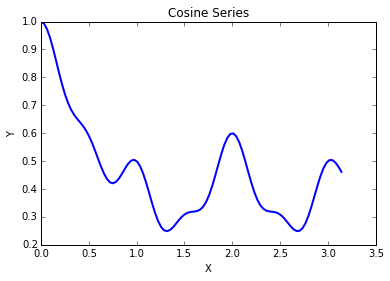

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

coeff = {0:0.5, 1:0.2, 2:0.15, 4:0.1, 8:0.05}
x = np.linspace(0., np.pi, 100)

def cos_series(coeff, x):
    total = 0.
    for n in coeff:
        total += coeff[n]*np.cos((n*np.pi*x)/2)
    return total
        
y = cos_series(coeff,x)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cosine Series')
#plt.text(0.5, 0.8, 'Cosine Series', fontsize = 16)
plt.plot(x,y, 'b-', lw = 2)
plt.show()

# Class

In [53]:
'''
A class of rocket that has a certain initial velocity v0. 
'''

class Y:
    def __init__(self, v0):
        self.v0 = v0     # a variable parameter: can be changed programmatically.
        self.g = 9.81    # a constant parameter: cannot be changed programmatically, but only by hand.
    
    def value(self, t):
        return self.v0*t - 0.5*self.g*t**2
    
# Now we can create an instance of the class Y:
y = Y(10)    # y --> self, 10 --> v0
print y.value(2.)

0.38


In [54]:
'''To make code more readable and therefore easier to modify and debug.
Unlike functions, an instance of a class is "introspective".

'''
class Y:
# The "Constructor"
# It is a good habit always to have a constructor in a class and to initialize class attributes
    def __init__(self, v0):
        self.v0 = v0     # a variable parameter: can be changed programmatically.
        self.g = 9.81    # a constant parameter: cannot be changed programmatically, but only by hand.

# .v0 and .g are called attributes.  
# They are basically assignment statements that initialized varaibles or constant.

    def value(self, t):
        return self.v0*t - 0.5*self.g*t**2
    def formula(self):
        return 'v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)

# .value and .formula are called methods
# They are like functions: they do "stuff" and return outputs
# -- here they return either the result of a calculation or a string.
 
y = Y(10.)
t = 2.
h = y.value(t)
print 'h(t = {:g}; v0 = {:g}) = {:g}'.format(t, y.v0, h)
print 'Formula:', y.formula()
print 'Initial velocity', y.v0
print "Gravity", y.g

h(t = 2; v0 = 10) = 0.38
Formula: v0*t - 0.5*g*t**2; parameters: v0 = 10, g = 9.81 (constant).
Initial velocity 10.0
Gravity 9.81


In [57]:
'''
Keyword arguments for class.

'''
class Y:
    def __init__(self, g = 9.81, v0 = 10.):
        self.g = g    
        self.v0 = v0
            
    def value(self, t):
        return self.v0*t - 0.5*self.g*t**2
    def formula(self):
        return 'v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)

#y = Y() 
# or 
y = Y(g = 9.81/6, v0 = 10)

t = 2.
h = y.value(t)
print 'h(t = {:g}; v0 = {:g}) = {:g}'.format(t, y.v0, h)
print 'Formula:', y.formula()
print 'Initial velocity', y.v0
print "Gravity", y.g

h(t = 2; v0 = 10) = 16.73
Formula: v0*t - 0.5*g*t**2; parameters: v0 = 10, g = 1.635 (constant).
Initial velocity 10
Gravity 1.635


In [58]:
'''Can think of the definition of the attributes as the definition of a dictionary:
{'v0':v0, 'g':9.81}
in fact every class instance has a dictionary: __dict__
'''
y = Y()   ### here v0 has been assigned the value 2.0.
print y.__dict__

{'v0': 10.0, 'g': 9.81}


## Short breakout: add a method that computes velocity

In [60]:
'''
Another example:
'''

class BankAccount:
    def __init__(self, name, account_number, initial_amount):
        # This will be printed at the time of the creation an instance of this class.
        # Because method __init__ get called immediately (and implicitly).
        print 'A bank account is created: {:s}'.format(name)
        
        self.name = name
        self.no = account_number
        self.balance = initial_amount  # the attribute balance is initialized
                                       # and changes depending on whether a deposit or
                                       # withdraw is made.
    
    def deposit(self, amount):
        self.balance += amount
        return   # return is optional when there is nothing to return, just as for a function
    
    def withdraw(self, amount):
        self.balance -= amount
        
    def dump(self):
        s = '{:s} {:s}, balance: {:g}'.format(self.name, self.no, self.balance)
        print s

In [65]:
#b1 = BankAccount('Fernando Perez', '11112222', 100000)
#b2 = BankAccount('Guido van Rossum', '22223333', 200000)
b3 = BankAccount('Ian Cone', '20282539', '1,000,000,000')
b1.deposit(1500)
#print b1.balance
print 'Ian Cone has $',b3.balance, 'dollars' 
print 'Cha-ching'
#b1.dump()

A bank account is created: Ian Cone
Ian Cone has $ 1,000,000,000 dollars
Cha-ching


## From this example, I hope you can see the utility of defining classes: you now can apply the same structure (the attributes "data" and the methods) to many people. 

In [67]:
'''
if you want to change the identity of a1, 
you can certainly do a1 = BankAccount('New Name', 'New Number', new_initial_points)
But you can also do this:
'''

b1.__init__('Bugs Bunny', '123', 200)
b1.name

A bank account is created: Bugs Bunny


'Bugs Bunny'

In [68]:
# In other words, when you do 
b1 = BankAccount('Bugs Bunny', '123', 200)
# you are implicitly calling the method __init__.

A bank account is created: Bugs Bunny


##Breakout Problem: Create a class Turtle that 

- has attributes: name and weight.
- when an instance of this class is created, immediately announce to the world its creation by printing a statement in a way that you want.
- has methods: 

        i) eat -- you can specify the amount that will be added to its weight.


        ii) hibernate -- an object that is an instance of this class will lose 10% 
               of its weight every time this method is called.

In [87]:
class Turtle:
    def __init__(self, name, weight):
        print 'I liek turtles. My names is {:s}'.format(name)
        self.name = name
        self.weight = weight
    def eat(self, amount):
        self.weight += amount
        print 'I am', self.weight, 'pounds'
        
    def hibernate(self):
        self.weight -= .1*self.weight
        print 'I am', self.weight, 'pounds'
        
    def dump(self):
        self.weight -= .5*self.weight
        print 'I am', self.weight, 'pounds'
        
timmy = Turtle('timmy', 500)

while timmy.weight > 1:
    timmy.dump()
    print 'Now I am', timmy.weight, 'pounds'
timmy.hibernate()


I liek turtles. My names is timmy
I am 250.0 pounds
Now I am 250.0 pounds
I am 125.0 pounds
Now I am 125.0 pounds
I am 62.5 pounds
Now I am 62.5 pounds
I am 31.25 pounds
Now I am 31.25 pounds
I am 15.625 pounds
Now I am 15.625 pounds
I am 7.8125 pounds
Now I am 7.8125 pounds
I am 3.90625 pounds
Now I am 3.90625 pounds
I am 1.953125 pounds
Now I am 1.953125 pounds
I am 0.9765625 pounds
Now I am 0.9765625 pounds
I am 0.87890625 pounds


In [ ]:
# can delete an existing instance of a class:
#if isinstance(t, Turtle):
#    del t
t = Turtle('Crush', 150)  

# From Finding Nemo, but actually sea turtles generally don't hibernate.
# Oh well!

In [ ]:
t.eat(5)
t.weight

In [ ]:
# can use tab completion
t.hibernate()
t.weight

## Special Methods

\_\_init\_\_ is called a special method.

All methods that start and end with \_\_ are special methods.

Their invocation is implicity.

Here's another example of a special: the method \_\_call\_\_

In [ ]:
class Y:
    def __init__(self, v0, g = 9.81):   
        self.v0 = v0     
        self.g = g    
        
    def value(self, t):
        v0, g = self.v0, self.g   # if you want...
        return v0*t - 0.5*g*t**2

    def formula(self):
        return 'h = v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)

 
y = Y(10.)
t = 2.
h = y.value(t)
print 'h(t = {:g}; v0 = {:g}) = {:g}'.format(t, y.v0, h)
print callable(y)


In [ ]:
class Y:
    def __init__(self, v0, g = 9.81):   
        self.v0 = v0     
        self.g = g    
        
    def value(self, t):
        v0, g = self.v0, self.g   # if you want...
        return v0*t - 0.5*g*t**2

    def __call__(self, t):
        return self.v0*t - 0.5*self.g*t**2

    def formula(self):
        return 'h = v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)

 

y = Y(10)
t = 2.
h = y(t)
print 'h(t = {:g}; v0 = {:g}) = {:g}'.format(t, y.v0, h)
print type(y)
print callable(y)

In [ ]:
'''
When you do h = y(t), you are implicitly invoking the method __call__;
i.e., it's the same as h = y.__call__(t):
'''

y = Y(10)
t = 2.
h = y(t)
print h
h2 = y.__call__(t)
print h2

### The difference between a regular method and .\_\_call\_\_() is that .value() is *not* a special method and has to be called explicitly whereas .\_\_call\_\_() is a special method and can be invoked implicitly.

### This implicitity makes the code more elegant, and very importantly, more readable.

In [ ]:
'''Using functions and classes together'''

def vert_dist(g, v0, t):
    return v0*t - 0.5*g*t**2

class Y:
    def __init__(self, v0, g = 9.81):   # The "Constructor"
        self.v0 = v0     # a variable parameter: can be changed programmatically.
        self.g = g    # a constant parameter: cannot be changed programmatically, but only by hand.

    def value(self, t):
        v0, g = self.v0, self.g   # if you want...
        return vert_dist(g, v0, t)

    def __call__(self, t):
        v0, g = self.v0, self.g   
        return vert_dist(g, v0, t)

    def formula(self):
        return 'h = v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)

y = Y(10)
t = 2.
h = y(t)
print 'h(t = {:g}; v0 = {:g}) = {:g}'.format(t, y.v0, h)
print type(y)
print callable(y)

###One way to think of the above cell considered as a python program:

1. At the heart of the program (or more accurately, the "brain" of the program) is the function vert_dist()

2. The class Y is a "wrapper" around that function.  The idea of a wrapper is very important in python.
It provides "bells and whistles" to an otherwise barebone function:

a) It provides nice peripherals/introspection to the barebone function, e.g., one can do

\>\>\> y.formula

b) It provides different ways of calling the function and making it more versatile.  E.g., as written vert_dist() doesn't work with diff().  But using the class Y, this can be done easily:

In [ ]:
diff = lambda f, x, h = 1e-10:(f(x+h) - f(x-h))/(2*h)

diff(y.value, 0.1)

In [ ]:
#Since we defined the method __call__, it can be done with better visual:
diff = lambda f, x, h = 1e-10:(f(x+h) - f(x-h))/(2*h)

diff(y, 0.1)

In [ ]:
#To this with a barebone function, you need to define it this way:
def vert_dist_rigid(t):
    v0 = 10.
    g = 9.81
    return v0*t - 0.5*g*t**2
diff(vert_dist_rigid, 0.1)
# But then you cannot change v0 and g programmatically; you have to do it "by hand".  
# -- not elegant, nor convenient!

In [ ]:
''' 
One more special method: __str__
If __str__ is not defined
>>> print y
gives 

<__main__.Y instance at 0x4fbee68>

If it is, whatever in the body of the method
will be printed
'''

def vert_dist(g, v0, t):
    return v0*t - 0.5*g*t**2

class Y:
    def __init__(self, v0, g = 9.81):   
        self.v0 = v0     # a variable parameter: can be changed programmatically.
        self.g = g    # a constant parameter: cannot be changed programmatically, but only by hand.

    def __call__(self, t):
        v0, g = self.v0, self.g   ### if you want...
        return vert_dist(g, v0, t)

    def __str__(self):
        return 'h = v0*t - 0.5*g*t**2; parameters: v0 = {:g}, g = {:g} (constant).'.format(self.v0, self.g)
        


y = Y(10)
t = 2.
print y
### this is the same as
print y.__str__()


## What have we achieved with the class Y:

1. Self-inspection
2. Can be called just like a function
3. But can also be treated as string!
4. Can be used as argument for another funciton

## A function can only do \#2 above.

##End of wk 5-1